# GA 2.1: Mesh Tips

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.1. For: 15 November, 2024.*

The purpose of this notebook is to illustrate how to use the class `Mesh` which is defined in the file `utilities.py`.

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utilities import *

The cell below begins with the geometry that is used to form the "U" for GA 1.2 It is defined by an array of points. When instantiating the class, the boundaries are specified using a list of lists, where each item (list) in the list defines the conditions, then the coordinates, of a boundary. For example:

```
boundaries = [[['Neumann', +1], [0, 1]]]
```

defines a boundary condition on the line connecting the 0th and 1st coordinates (rows 0 and 1 of `coordinates`, where a Neumann condition with $\partial\phi/\partial n=1$. Note in the example below, that multiple coordinates can be used to define a boundary line.

When the class is instantiated, all boundary sides that are not specified are unassigned. When the discretized scheme is solved (later with method `solve`), these unspecified boundaries receive a no flux boundary by default.

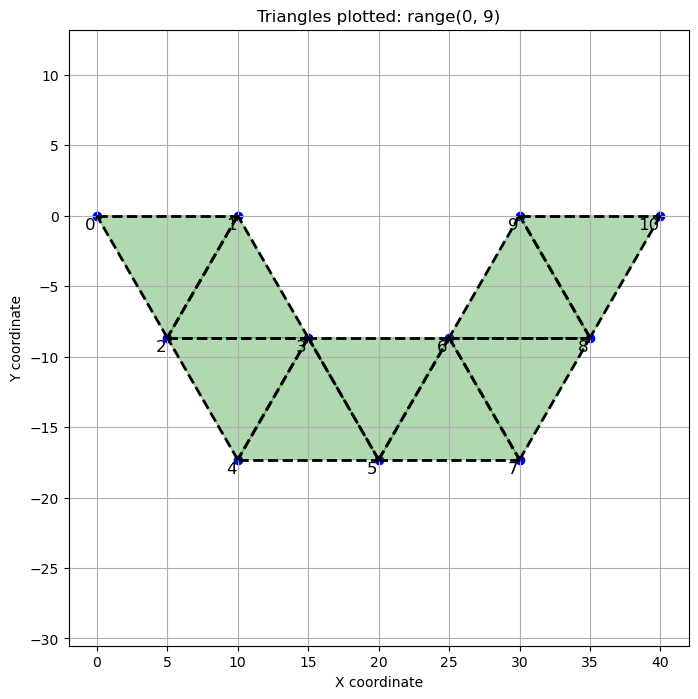

In [2]:
length = 10

coordinates = [[  0.,    0.   ],
               [ 10.,    0.   ],
               [  5.,   -8.660],
               [ 15.,   -8.660],
               [ 10.,  -17.320],
               [ 20.,  -17.320],
               [ 25.,   -8.660],
               [ 30.,  -17.320],
               [ 35.,   -8.660],
               [ 30.,    0.   ],
               [ 40.,    0.   ]]

coordinates = np.array(coordinates)

boundaries = [[['Neumann', +1], [0, 1]],
              [['Neumann',  0], [1, 3, 6, 9]],
              [['Neumann', -1], [9, 10]],
              [['Neumann',  0], [10, 7, 4, 0]]]

mesh = Mesh(coordinates, length, boundaries)
mesh.plot_triangles();

In [4]:
import numpy as np
from utilities import *

In [5]:
coordinates = np.array([x,y]).T
print(coordinates)

[[  0.           0.        ]
 [ 10.           0.        ]
 [  5.          -8.66025404]
 [ 15.          -8.66025404]
 [ 10.         -17.32050808]
 [ 20.         -17.32050808]
 [ 25.          -8.66025404]
 [ 30.         -17.32050808]
 [ 35.          -8.66025404]
 [ 30.           0.        ]
 [ 40.           0.        ]]


Boundaries are specified with a list of lists, where each item in the list defines a boundary in the format:

```
[coordinate_index, boundary_type]
```

Each boundary can be defined using as many nodes as desired, though the boundary will retain its shape regardless of how many times the mesh is refined (this is logical, as refinement only subdivides triangles, thus the sides of a triangle always remain straight).



In [6]:
boundaries = [[['Neumann', +5], [0, 1]],
              [['Neumann',  0], [1, 3, 6, 9]],
              [['Neumann', +5], [9, 10]],
              [['Neumann',  0], [10, 7, 4, 0]]]

In [7]:
mesh = Mesh(coordinates, length, boundaries)
# mesh.define_triangles()
# mesh.get_all_sides();

In [8]:
mesh.triangles

[[0, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5],
 [3, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [6, 8, 9],
 [8, 9, 10]]

In [9]:
len(mesh.triangles)

9

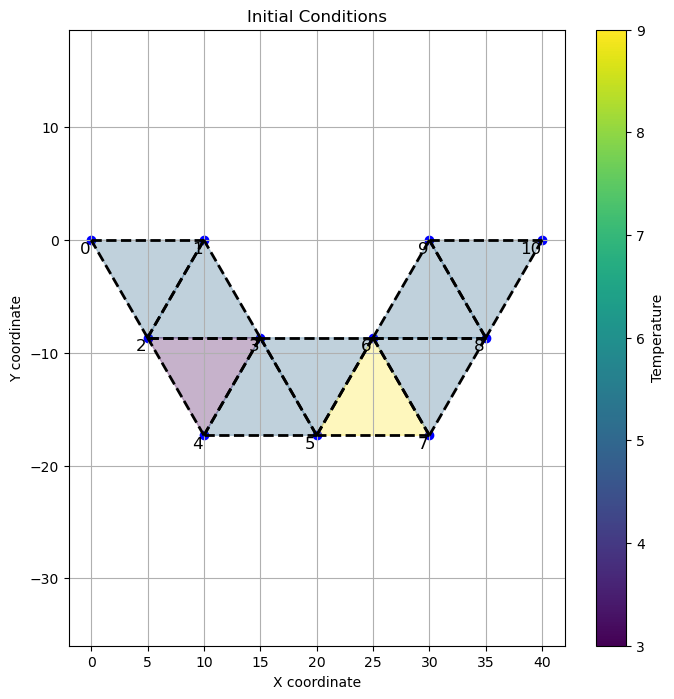

In [10]:
mesh.set_initial_conditions(default=5, special_triangles=[[2, 3],[5,9]])
mesh.plot_triangles(fill_color='initial_conditions');

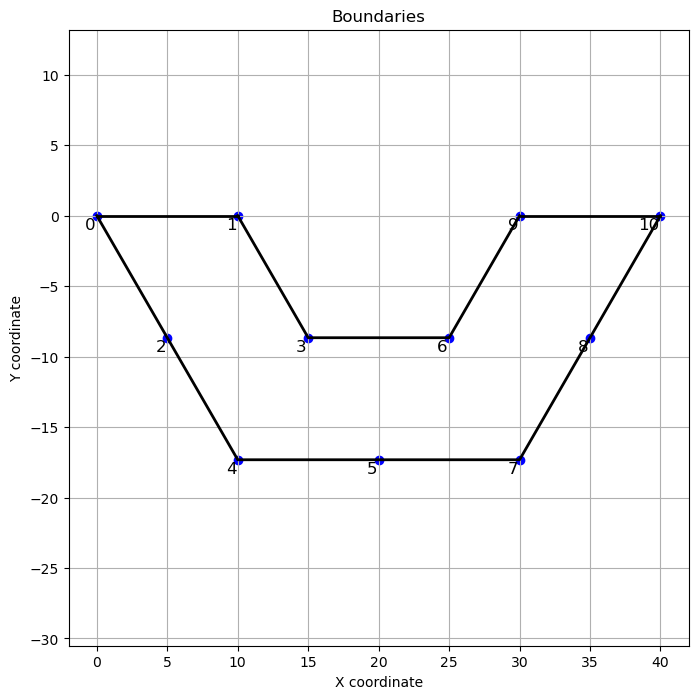

In [11]:
mesh.plot_boundaries();

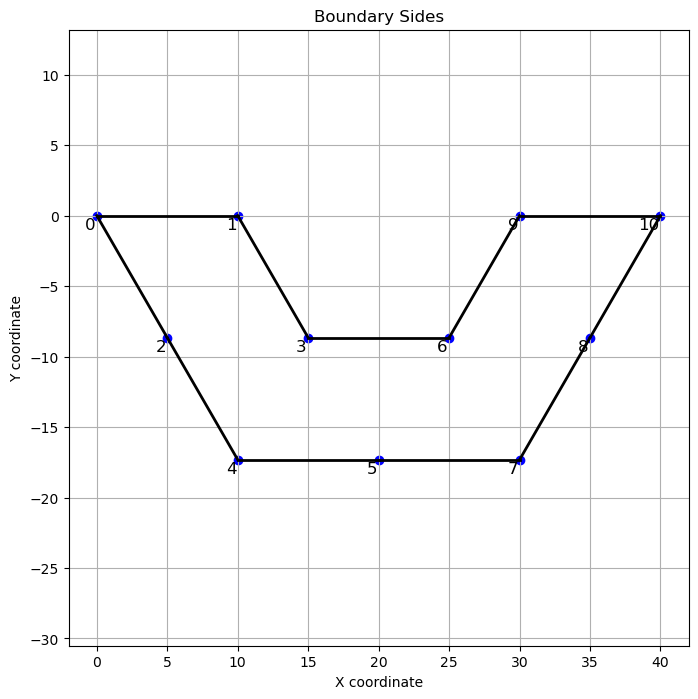

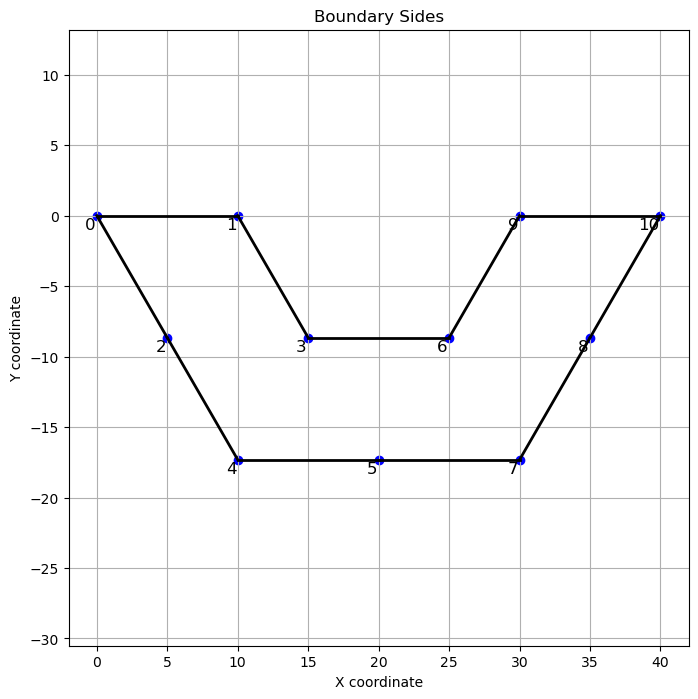

In [12]:
mesh.plot_boundary_sides()

In [13]:
mesh.initial_conditions

array([5., 5., 3., 5., 5., 9., 5., 5., 5.])

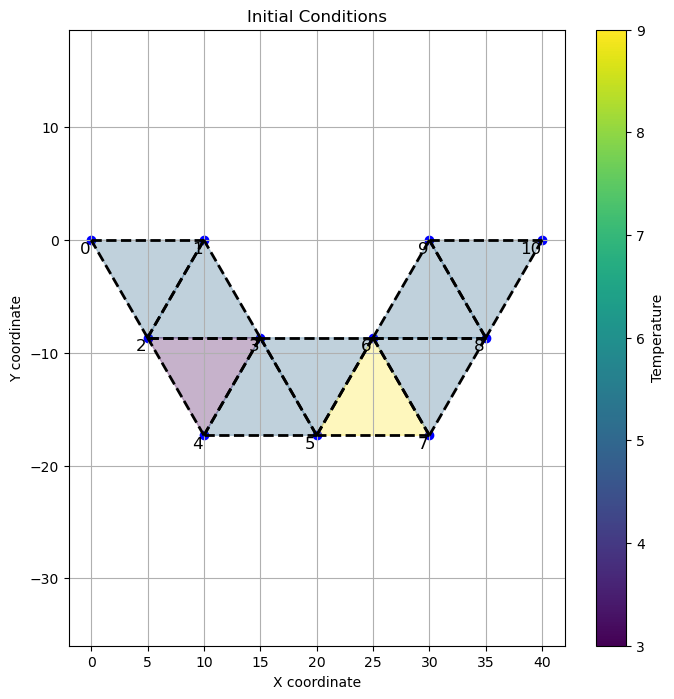

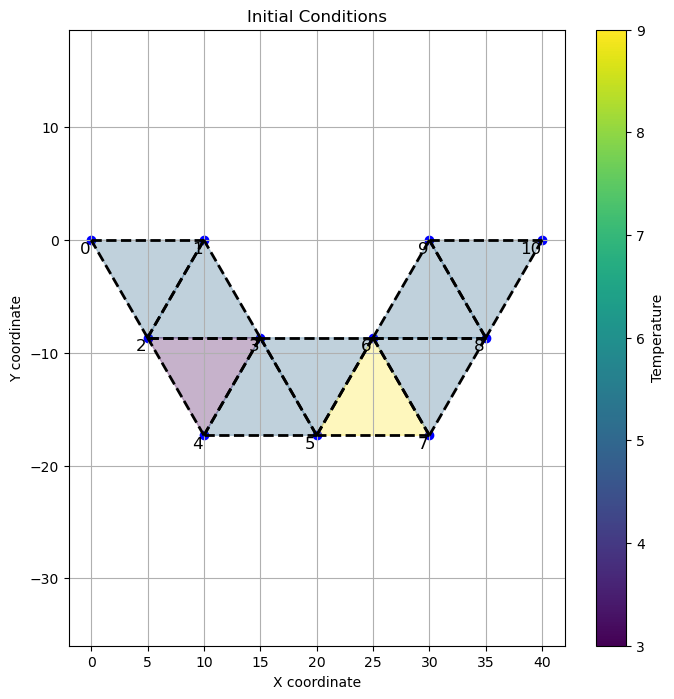

In [14]:
mesh.plot_triangles(fill_color='initial_conditions')

All triangles seem to be defined correctly!


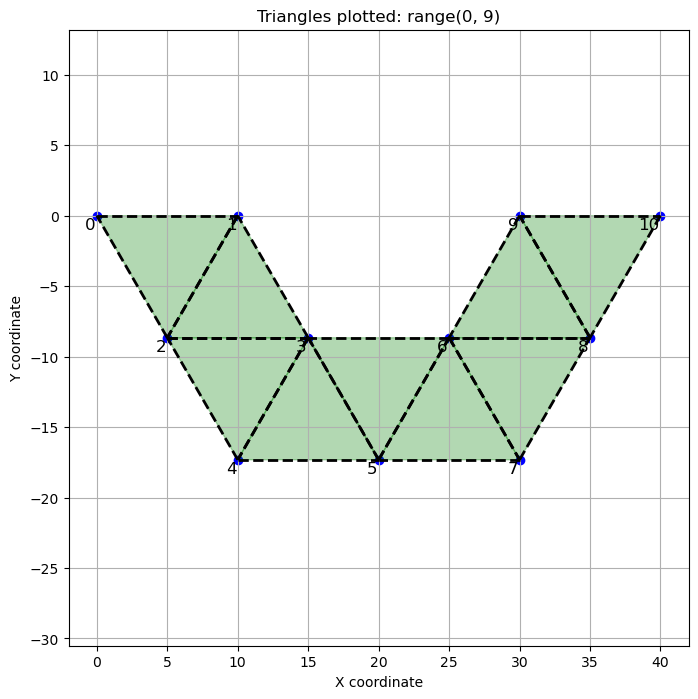

In [15]:
mesh.try_triangles()

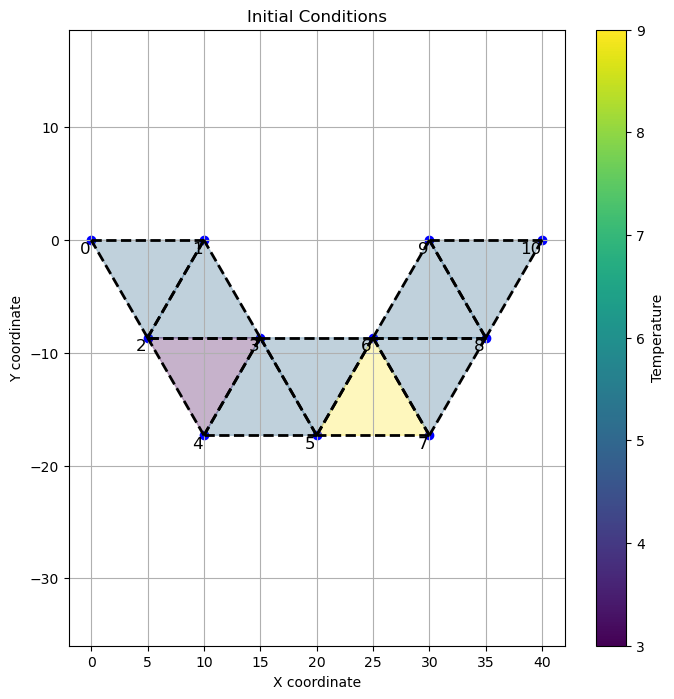

In [16]:
# mesh.refine_mesh()
# mesh.get_initial_conditions()
mesh.plot_triangles(fill_color='initial_conditions');

Solving complete!
  t_final = 20, Nt = 1000, D = 50
NOTE: min value color scale adjusted below min initial value


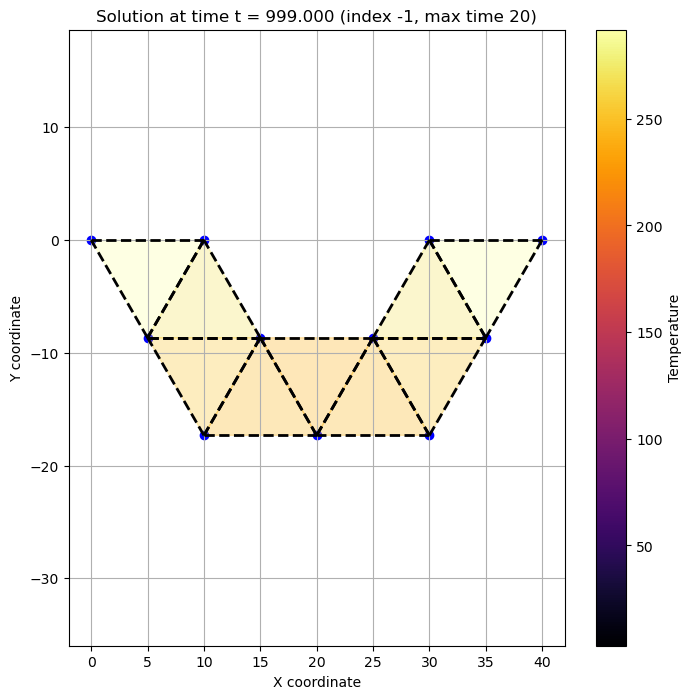

In [17]:
# mesh.set_initial_conditions(default=0, special_triangles=[[0, 10]])

mesh.solve(20, 1000, 50)
mesh.plot_triangles(fill_color='unknowns', time_step=-1,
                    show_labels=False);
# mesh.unknowns[50]

Refining mesh...initial status:
  refinements:  0
  points:       11
  triangles:    9
  sides:        19
  side length:  10
Refinement complete...final status:
  refinements:  1
  points:       30
  triangles:    36
  sides:        65
  side length:  5.0
Time taken for refinement: 0.193226 seconds


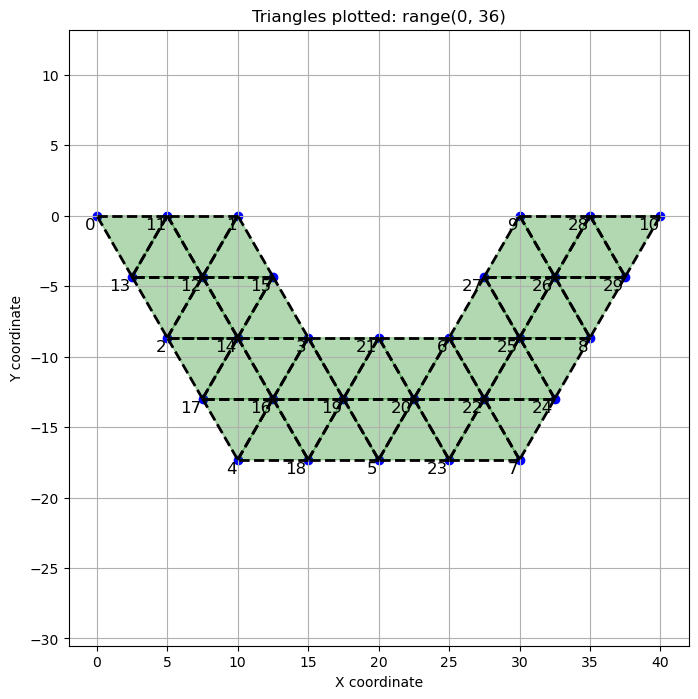

In [18]:
mesh.refine_mesh();
mesh.plot_triangles();

In [19]:
print(mesh.boundary_sides[0])
mesh.all_sides[mesh.boundary_sides[0]]
sorted([11,0])==sorted(mesh.all_sides[mesh.boundary_sides[0]])
len(mesh.boundary_side_types)


0


22